In [1]:
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np

import matplotlib.pyplot as plt


# from radio_beam.commonbeam import getMinVolEllipse
#
from utils import grainPreprocess, grainShow, grainMark, grainDraw, grainApprox, grainStats, grainMorphology,grainGenerate


from matplotlib.image import NonUniformImage
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

from tqdm.notebook import tqdm
import json



In [ ]:
{'path':paths[i],
 'name':name,
 'type':types_dict[names[i]],
 'legend':[{'a_beams':legend1,'b_beams':legend2}],
 'density_curve_scatter':[{'a_beams':(x1.flatten(),y1.flatten()),'b_beams':(x2.flatten(),y2.flatten())}],
 'linear_approx_plot':[{'a_beams':(x_pred1.flatten(), y_pred1.flatten()),'b_beams':(x_pred2.flatten(), y_pred2.flatten())}],
 'linear_approx_data':[{'a_beams':{'k':k1,'b':b1,'angle':angle1,'score':score1},'b_beams':{'k':k2,'b':b2,'angle':angle2,'score':score2}}],
 'beams_length_series':[{'a_beams':all_a_beams,'b_beams':all_b_beams}],
 'pixel2meter':pixel,
 }

## Раcпределение длин полуосей

In [ ]:
def ellipses_beams(data,save_name, step, N, M, indices=None,save=False, scatter_size=60,font_size=20):
    #
    # вывод распределения длин а- и б- полуосей для разных образцов
    #
    alloys_indices=range(len(data))

    if indices is not None:
        alloys_indices=indices

    matplotlib.rc('xtick', labelsize=font_size)
    matplotlib.rc('ytick', labelsize=font_size)

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors = ['orange', 'red','blue','green', 'indigo']

    # ax1.set_ylabel('ln( p(x) )')
    # ax2.set_ylabel('ln( p(x) )')


    beam_types=['a_beams','b_beams']
    beam_xlabel=['a, мкм','b, мкм']

    legend=[]
    for i in alloys_indices:
        legend.append(data['data'][i]['name']+' '+data['data'][i]['type'])


    for k,beam_type in enumerate(beam_types):

        fig=plt.figure(figsize=(N, M),facecolor='White')
        plt.rcParams['axes.facecolor'] = 'White'


        plt.xlabel(beam_xlabel[k],fontsize=font_size)

        # linear approx
        for i in alloys_indices:

            plt.plot(data['data'][i]['linear_approx_plot'][0][beam_type][0],
                     data['data'][i]['linear_approx_plot'][0][beam_type][1],color=colors[i])

        # density curve
        for i in alloys_indices:
            marker = markers[i]
            plt.scatter(data['data'][i]['density_curve_scatter'][0][beam_type][0],data['data'][i]['density_curve_scatter'][0][beam_type][1],  marker=marker,color=colors[i],s=scatter_size)

        if save:
            plt.savefig(f'bimodal_beams_{beam_type}_{save_name}_step_{step}.png',bbox_inches='tight')
        plt.show()

In [ ]:
step=5
folder='data/beams'
file_name = 'bc_left_(1536,1536,1)_preprocess'
# file_name = 'o_bc_left_4x_768_360_median_generated_preprocess'
data = open(f'{folder}/{file_name}_step_{step}_beams.json',encoding='utf-8')
data = json.load(data)

In [ ]:
%%time

N = 7
M = 7

step = 2
# save=True
save=False

# file_name='o_bc_left_4x_768_360_256_median_generated_preprocess'
file_name='data/angles/bc_left_(1536,1536,1)_preprocess'

save_name='original'


ellipses_beams(data,save_name, step, N, M, indices=[3,0,2],save=save)
# diametr_approx_all(path,save_name, step, N, M, indices=[0, 2, 3],save=save)

In [10]:
def ellipses_beams_2(data_1,data_2,save_name, step, beam_types, N, M, indices=None,save=False, scatter_size=60,font_size=20):
    #
    # вывод распределения длин а- и б- полуосей для разных образцов
    #
    alloys_indices=range(len(data_1))

    if indices is not None:
        alloys_indices=indices

    matplotlib.rc('xtick', labelsize=font_size)
    matplotlib.rc('ytick', labelsize=font_size)

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']
    colors_2 = ['olive', 'purple','cyan','pink', 'blue', 'lime']

    # beam_types=['a_beams','b_beams']
    beam_xlabel={'a_beams':'a, мкм',
                 'b_beams':'b, мкм'}

    legends=[]
    for j,i in enumerate(alloys_indices):
        legends.append([])
        legends[j].append(data_1['data'][i]['name']+' '+data_1['data'][i]['type']+ ' real')
        legends[j].append(data_2['data'][i]['name']+' '+data_2['data'][i]['type']+ ' fake')


    for beam_type in beam_types:
        
        fig, axes = plt.subplots(1,3,figsize=(N, M))

        plt.rcParams['axes.facecolor'] = 'White'

        # linear approx
        for j,i in enumerate(alloys_indices):
            axes[j].plot(data_1['data'][i]['linear_approx_plot'][0][beam_type][0],
                     data_1['data'][i]['linear_approx_plot'][0][beam_type][1],color=colors_1[i])
            
        for j,i in enumerate(alloys_indices):
            axes[j].plot(data_2['data'][i]['linear_approx_plot'][0][beam_type][0],
                     data_2['data'][i]['linear_approx_plot'][0][beam_type][1],color=colors_2[i])

        # density curve
        for j,i in enumerate(alloys_indices):
            marker = markers[i]
            axes[j].scatter(data_1['data'][i]['density_curve_scatter'][0][beam_type][0],
                        data_1['data'][i]['density_curve_scatter'][0][beam_type][1],
                        marker=marker,color=colors_1[i],s=scatter_size)
        
        for j,i in enumerate(alloys_indices):
            marker = markers[i]
            axes[j].scatter(data_2['data'][i]['density_curve_scatter'][0][beam_type][0],
                        data_2['data'][i]['density_curve_scatter'][0][beam_type][1],
                        marker=marker,color=colors_2[i],s=scatter_size)     
        
        for j in range(len(axes)):
            axes[j].legend(legends[j])
            axes[j].set_xlabel(beam_xlabel[beam_type],fontsize=font_size)
            axes[j].set_ylabel('log(p(x)) ',fontsize=font_size)
            
        fig.suptitle(save_name +' '+ beam_type) 
            
        if save:
            plt.savefig(f'bimodal_beams_{beam_type}_{save_name}_step_{step}.png',bbox_inches='tight')
            
        plt.show()

In [11]:
step=5

file_name_1='data/beams/bc_left_(1536,1536,1)_preprocess'

data_1 = open(f'{file_name_1}_step_{step}_beams.json',encoding='utf-8')
data_1 = json.load(data_1)

In [13]:
plt.rcParams['font.size'] = '15'

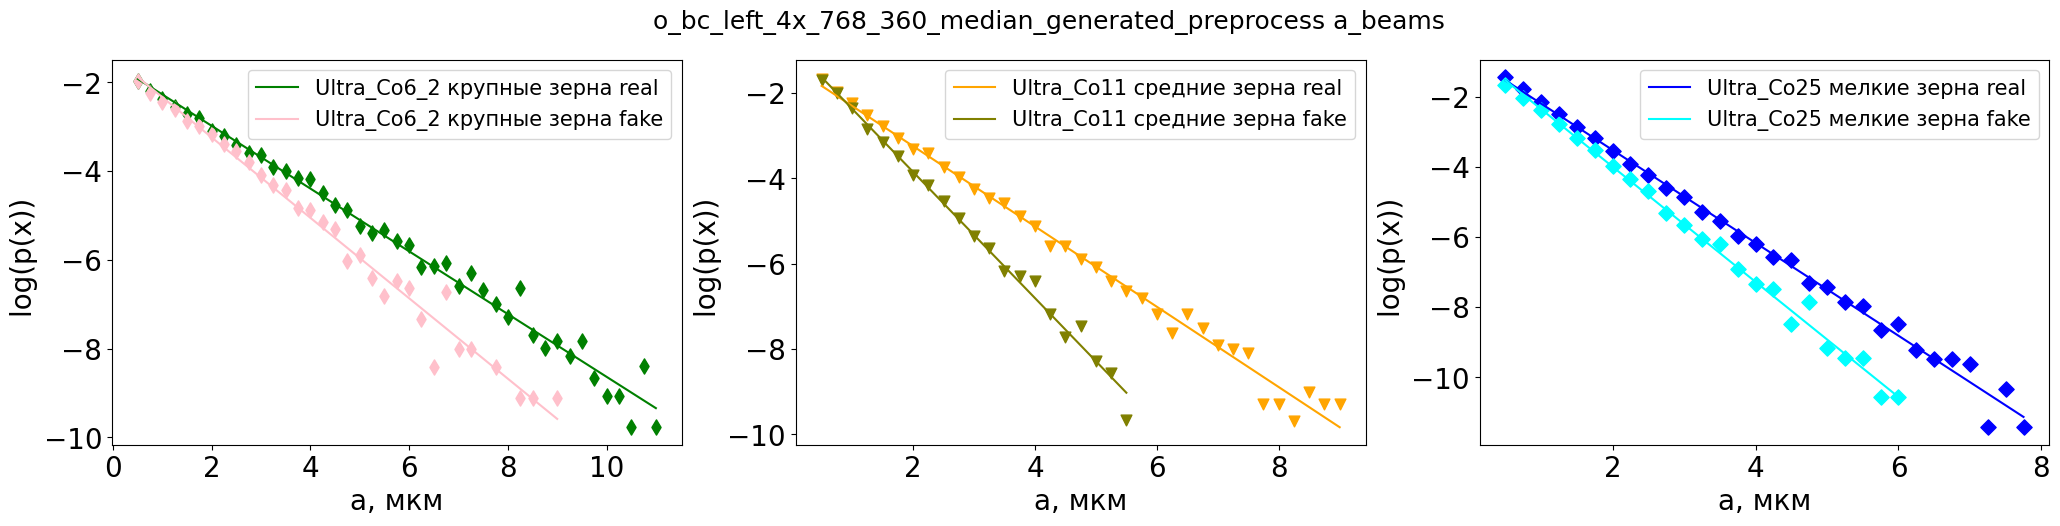

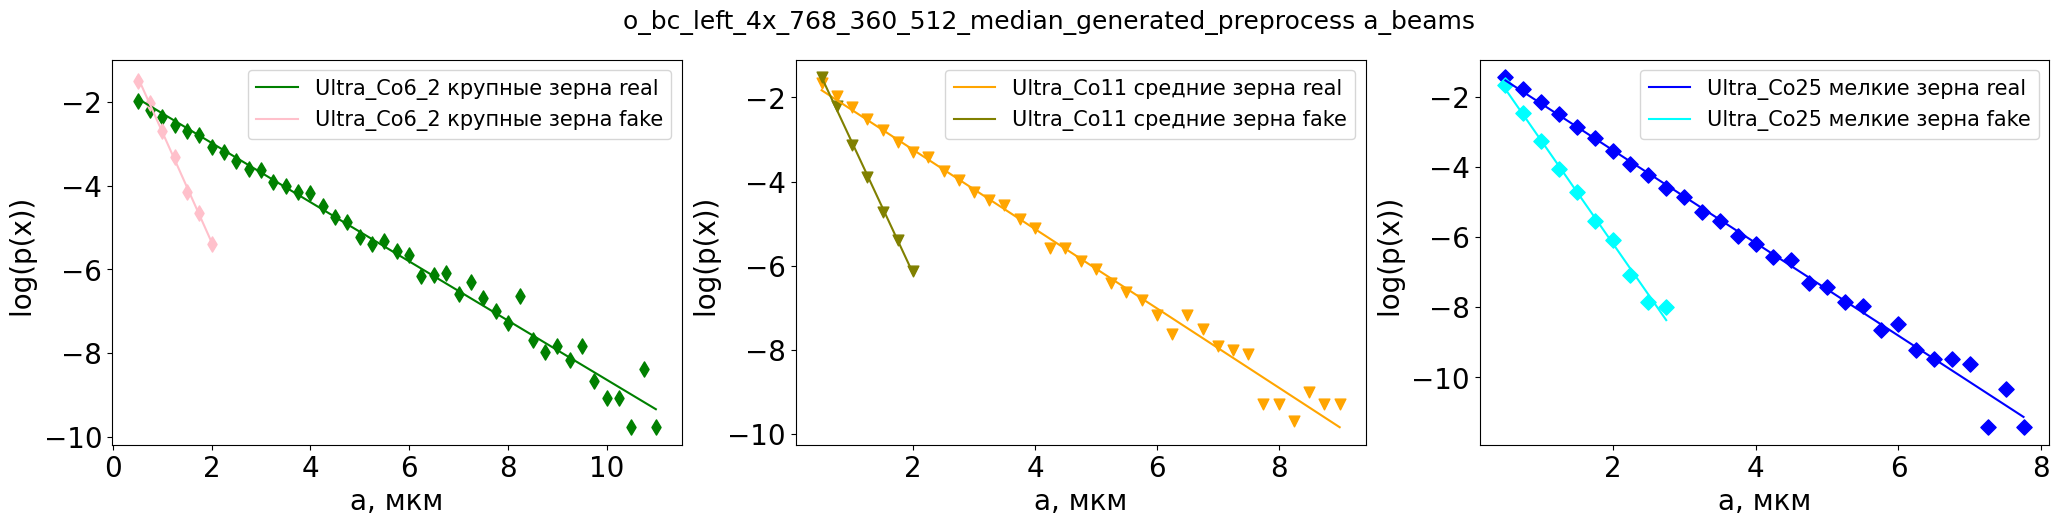

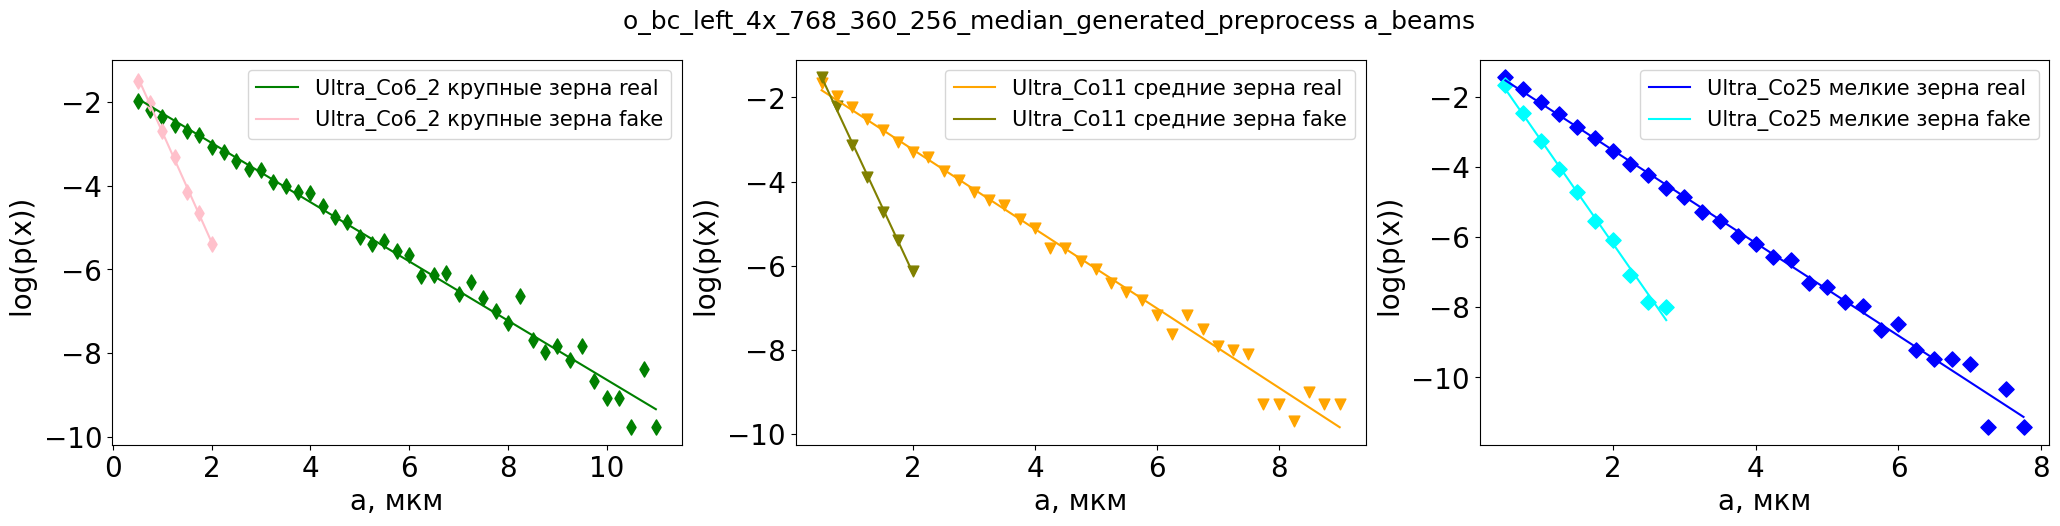

In [16]:
file_name_2_1='data/beams/o_bc_left_4x_768_360_median_generated_preprocess'
file_name_2_2='data/beams/o_bc_left_4x_768_360_512_median_generated_preprocess'
file_name_2_3='data/beams/o_bc_left_4x_768_360_256_median_generated_preprocess'

names = [file_name_2_1, file_name_2_2, file_name_2_3]

N = 25
M = 5



# save = True
save = False

for file_name_2 in names:

    save_name=file_name_2.split('/')[-1]
    # indices=[3,0,1,4, 2]
    indices=[3,0, 2]

    data_2 = open(f'{file_name_2}_step_{step}_beams.json',encoding='utf-8')
    data_2 = json.load(data_2)

    ellipses_beams_2(data_1,data_2,save_name, step, ['a_beams'], N, M, indices=indices,save=save)

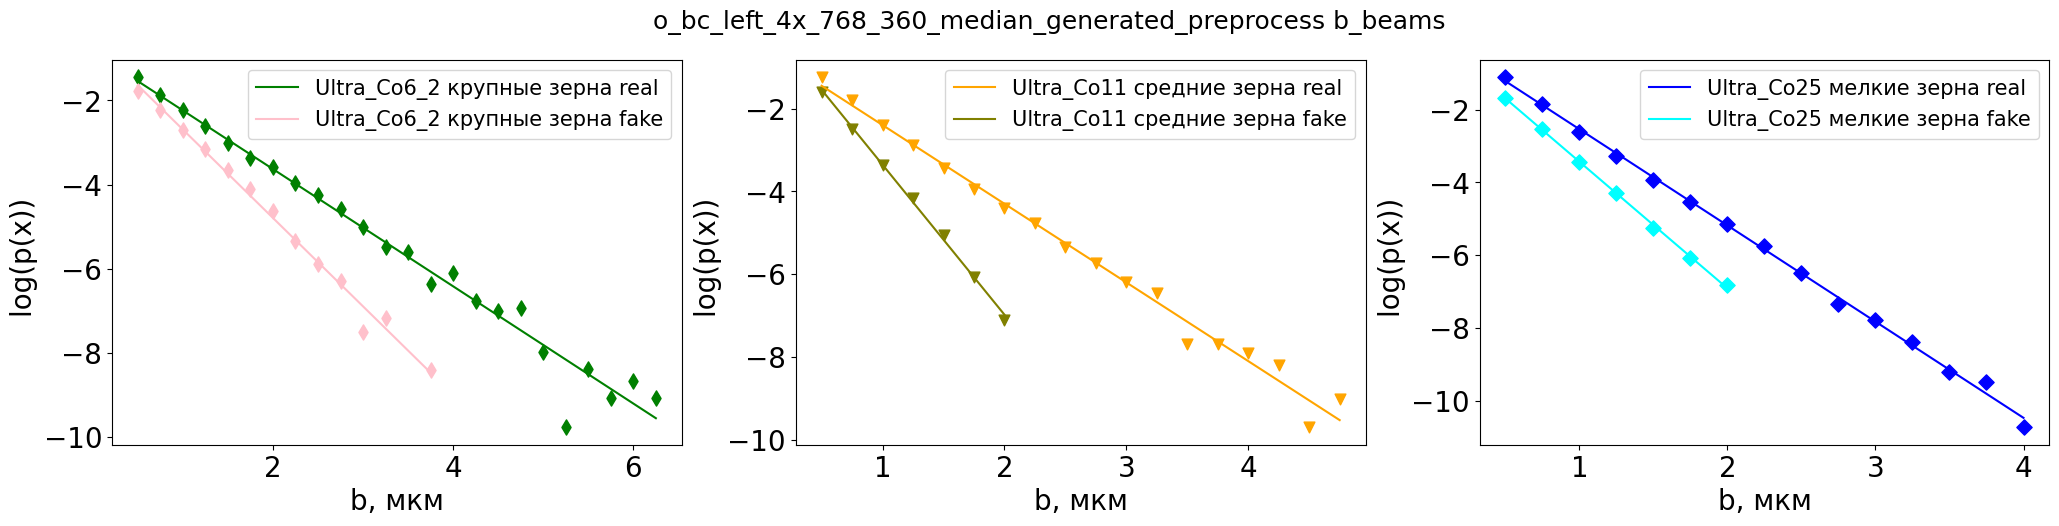

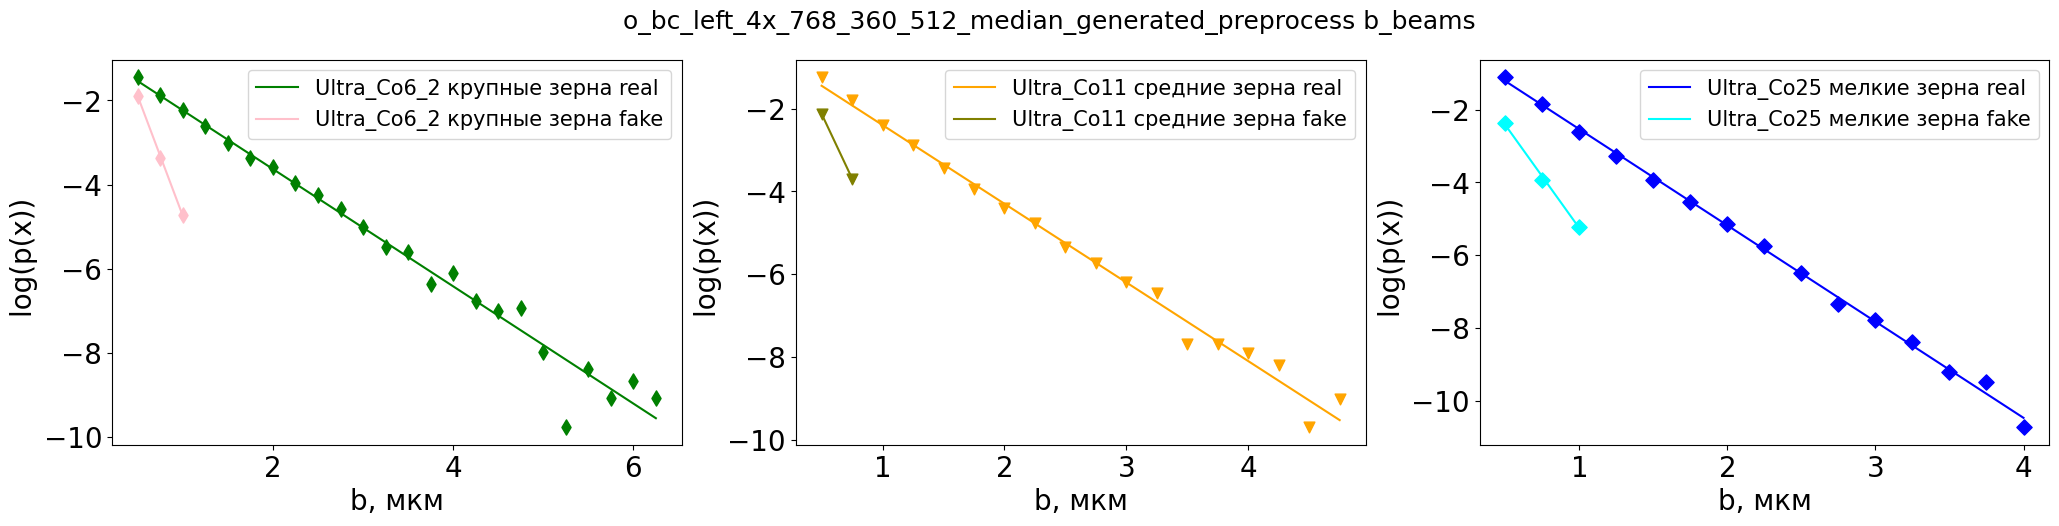

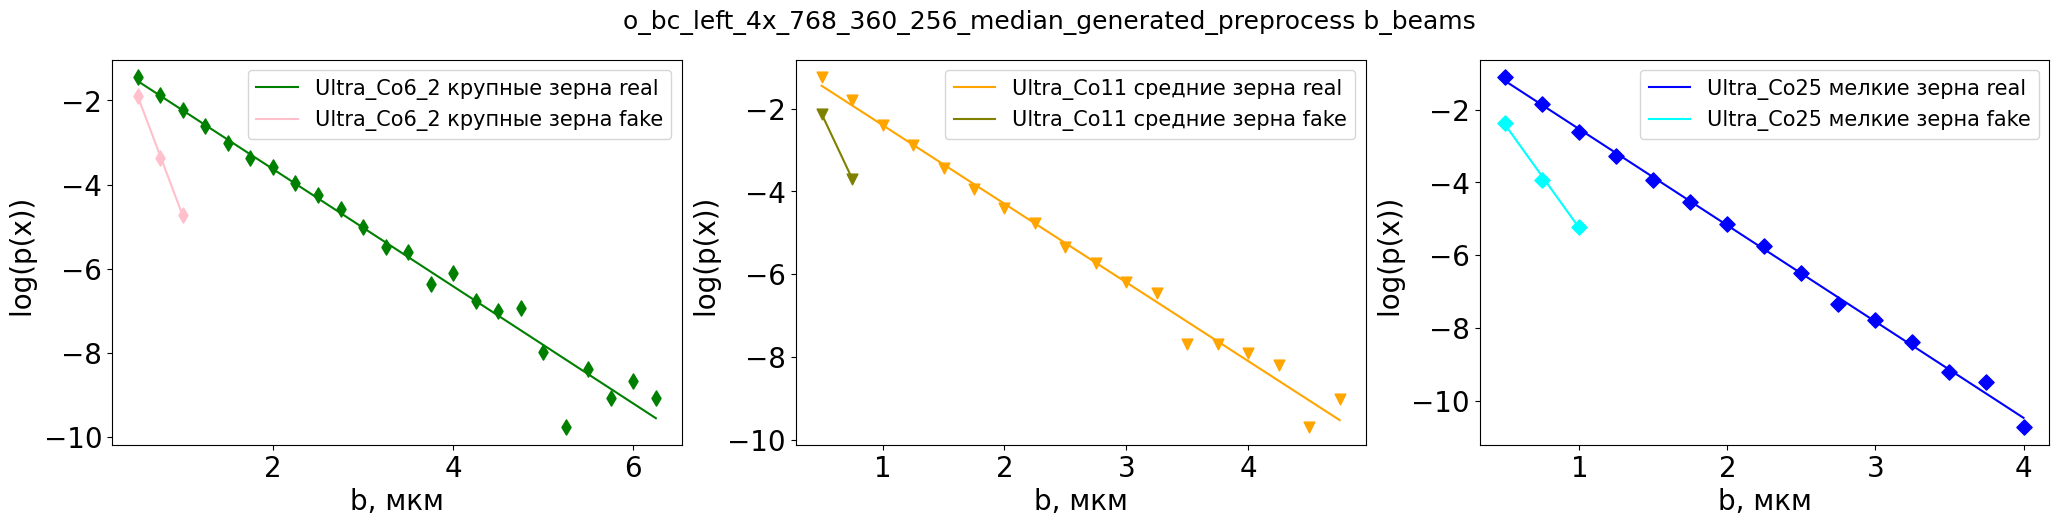

In [17]:
file_name_2_1='data/beams/o_bc_left_4x_768_360_median_generated_preprocess'
file_name_2_2='data/beams/o_bc_left_4x_768_360_512_median_generated_preprocess'
file_name_2_3='data/beams/o_bc_left_4x_768_360_256_median_generated_preprocess'

names = [file_name_2_1, file_name_2_2, file_name_2_3]

N = 25
M = 5



# save = True
save = False

for file_name_2 in names:

    save_name=file_name_2.split('/')[-1]
    # indices=[3,0,1,4, 2]
    indices=[3,0, 2]

    data_2 = open(f'{file_name_2}_step_{step}_beams.json',encoding='utf-8')
    data_2 = json.load(data_2)

    ellipses_beams_2(data_1,data_2,save_name, step, ['b_beams'], N, M, indices=indices,save=save)

## Heatmap для двумерного распределения полуосей

In [ ]:
def beams_heatmap(data,step,saved_names,indices=None,bin_max=30,N=7,M=7,font_size=20,save=False,scatter_size=60):

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors = ['orange', 'red','blue','green', 'indigo']

    if indices is not None:
        alloys_indices=indices
    else:
        alloys_indices=range(len(data['data']))

    names=[]
    matrices=[]
    ellipses_num=[]
    polynom_x=[]
    polynom_y=[]

    for i in alloys_indices:
        a_beams = np.array(data['data'][i]['beams_length_series'][0]['a_beams'])
        b_beams= np.array(data['data'][i]['beams_length_series'][0]['b_beams'])

        ellipses_num.append(len(a_beams))

        matrix=np.zeros((bin_max,bin_max))

        for k,a_i in enumerate(a_beams):
            b_i=b_beams[k]
            if a_i<bin_max and b_i < bin_max:
                matrix[a_i,b_i]+=1

        matrix/=matrix.sum()
        matrices.append(matrix)
        names.append(data['data'][i]['name']+' '+data['data'][i]['type'])

    for i,matrix in enumerate(matrices):

        fig=plt.figure(figsize=(N, M),facecolor='White')
        plt.rcParams['axes.facecolor'] = 'White'

        matplotlib.rc('xtick', labelsize=font_size)
        matplotlib.rc('ytick', labelsize=font_size)

        im=plt.imshow(matrix,norm=mpl.colors.LogNorm(), cmap=plt.cm.RdYlBu_r)
        # im=ax.pcolormesh(matrices[i],norm=normalizer, cmap=plt.cm.RdYlBu_r)

        y=np.array(range(bin_max))
        x=[]
        for y_i in y:
            max_val=matrix[y_i].max()
            x.append(np.where(matrix[y_i]==max_val)[0][0])
        x=np.array(x)

        coefs = np.polyfit(x.flatten(), y.flatten(), 2)

        x=np.array(range(bin_max))
        plt.plot(x,np.polyval(coefs, x),color='green')

        for j,coef in enumerate(coefs):
            coefs[j]=round(coef,3)

        polynom_x.append(x)
        polynom_y.append(np.polyval(coefs, x).astype(np.int32))



        print(f'{names[i]}\ncoefs={coefs}\nellipses num={ellipses_num[i]}')

        fig.colorbar(im,  orientation='vertical')

        plt.xlabel('b, мкм',fontsize=font_size)
        plt.ylabel('a, мкм',fontsize=font_size)
        plt.title(names[i],fontsize=15)

        plt.xlim(0,bin_max)
        plt.ylim(0,bin_max)
        plt.grid(False)

        if save:
            # plt.savefig(f'{names[i]}_step_{step}.png',bbox_inches='tight')
            name=data['data'][i]['name']
            plt.savefig(f'{saved_names[name]}.png',bbox_inches='tight')
        plt.show()


    fig=plt.figure(figsize=(N, M),facecolor='White')
    plt.rcParams['axes.facecolor'] = 'White'

    matplotlib.rc('xtick', labelsize=font_size)
    matplotlib.rc('ytick', labelsize=font_size)


    for k,i in enumerate(alloys_indices):
        x=polynom_x[k]
        y=polynom_y[k].astype(np.int32)

        y_clean=[]
        for y_i in y:
            if y_i<0:
                y_clean.append(0)
            if y_i<bin_max and y_i>=0:
                y_clean.append(y_i)

        x_clean=x[:len(y_clean)]
        y_clean=np.array(y_clean)

        polynom_union_image=matrices[k][y_clean,x_clean]
        plt.xticks(range(0,35,10))

        plt.scatter(y_clean,polynom_union_image,marker=markers[i],color=colors[i],s=scatter_size)

    matplotlib.rc('xtick', labelsize=font_size)
    matplotlib.rc('ytick', labelsize=font_size)

    plt.xlabel('a, мкм', fontsize=font_size)
    plt.ylabel('p(a,b)', fontsize=font_size,labelpad=15)


    if save:

        plt.savefig(f'polynom_heatmap_step={step}.png',bbox_inches='tight')

    plt.show()

In [ ]:
N = 7
M = 7

step = 2
# save=True
save=False

saved_image_name='original'

names_new={'Ultra_Co11':'AB_Co11_medium',
           'Ultra_Co15':'AB_Co15_medium_small',
           'Ultra_Co25':'AB_Co25_small',
           'Ultra_Co6_2':'AB_Co6_large',
           'Ultra_Co8':'AB_Co_8_medium_small'}



beams_heatmap(data,saved_names=names_new,step=step,indices=[3,0,2], N=N, M=M,save=save, font_size=45, scatter_size=110)
